Import required Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import xgboost
from scipy.stats import spearmanr
import warnings
warnings.filterwarnings('ignore')


Load training data from the csv file 

In [2]:
data = pd.read_csv(r'D:\ML Project\Arya assignment\Data set\training_set.csv')

In [3]:
data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,3905,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12,0
3906,3906,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4,0
3907,3907,0.12,0.00,0.12,0.00,0.00,0.25,0.00,0.00,0.00,...,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131,0
3908,3908,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.12,0.00,...,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81,1


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12,0
3906,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4,0
3907,0.12,0.00,0.12,0.00,0.00,0.25,0.00,0.00,0.00,0.00,...,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131,0
3908,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.12,0.00,0.00,...,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81,1


Count number of datapoints in each class 

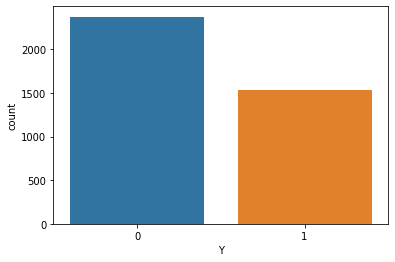

In [7]:
sns.countplot(data = data, x = 'Y')
plt.show()

In [8]:
X = data.drop('Y', axis=1)
y = data['Y']

In [9]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,0.56,...,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,0.00,...,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12
3906,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4
3907,0.12,0.00,0.12,0.00,0.00,0.25,0.00,0.00,0.00,0.00,...,0.0,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131
3908,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.12,0.00,0.00,...,0.0,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81


In [10]:
y

0       0
1       1
2       0
3       1
4       1
       ..
3905    0
3906    0
3907    0
3908    1
3909    1
Name: Y, Length: 3910, dtype: int64

In [11]:
type(y)

pandas.core.series.Series

In [12]:
y = pd.DataFrame(y, columns = ['Y'])

In [13]:
y

,Y
0,0
1,1
2,0
3,1
4,1
...,...
3905,0
3906,0
3907,0
3908,1


Checking null values

In [15]:
X.isnull().any().sum()

0

In [16]:
X.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,...,0.033281,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,...,0.301611,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000
max,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,18.180000,...,10.000000,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000


In [17]:
data.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'Y'],
      dtype='object')

In [18]:
data['X'+str(1)]

0       0.00
1       0.00
2       0.00
3       0.64
4       0.58
        ... 
3905    0.00
3906    0.00
3907    0.12
3908    0.00
3909    0.96
Name: X1, Length: 3910, dtype: float64

In [19]:
data['Y']==0

0        True
1       False
2        True
3       False
4       False
        ...  
3905     True
3906     True
3907     True
3908    False
3909    False
Name: Y, Length: 3910, dtype: bool

Plot pdf's of each feature corresponding to their classes

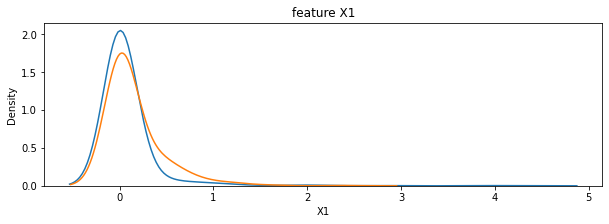

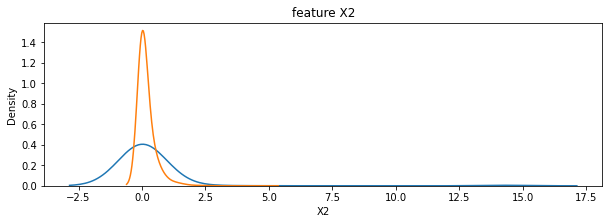

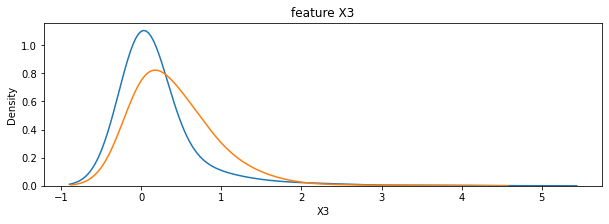

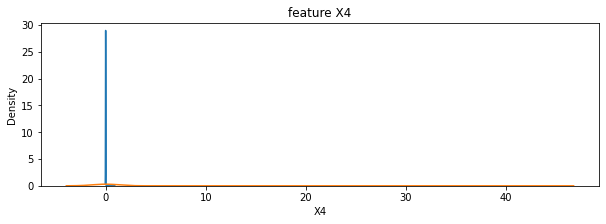

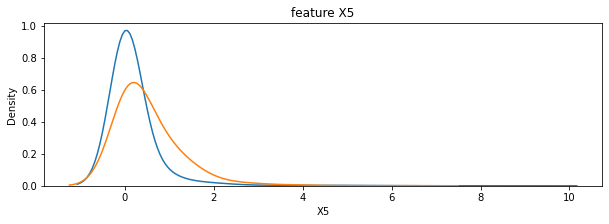

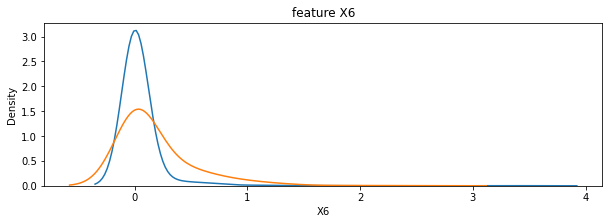

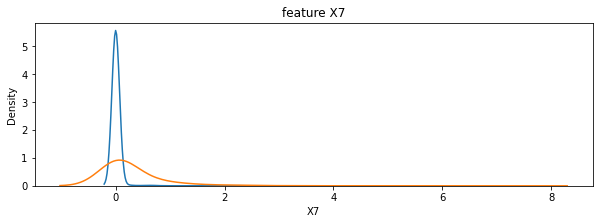

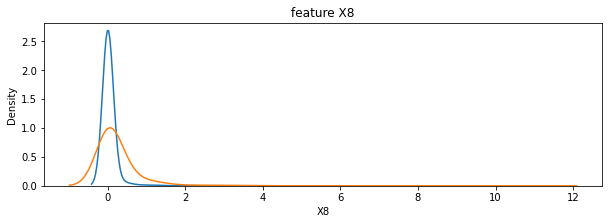

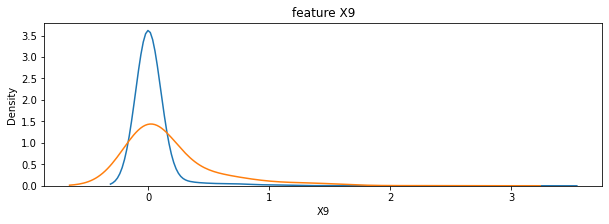

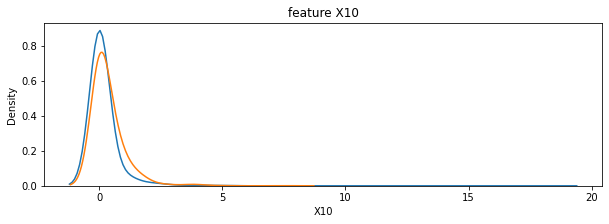

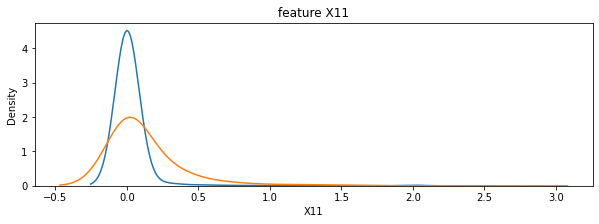

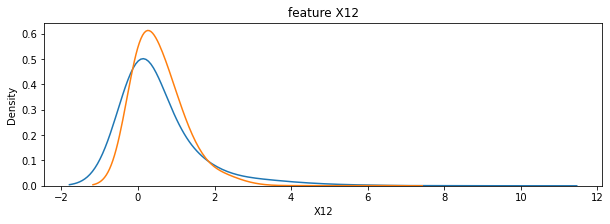

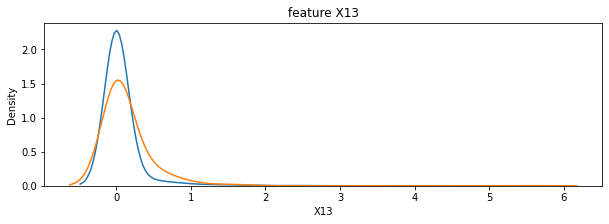

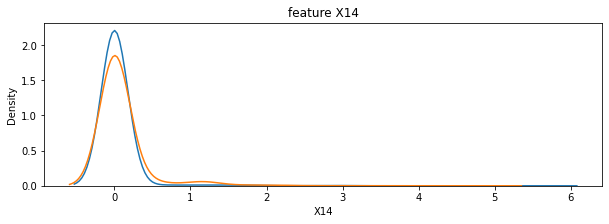

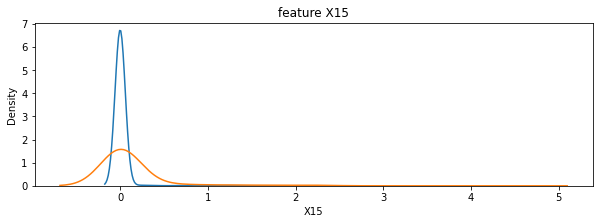

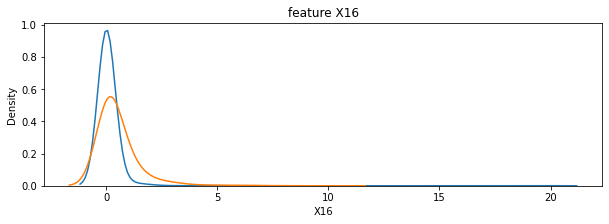

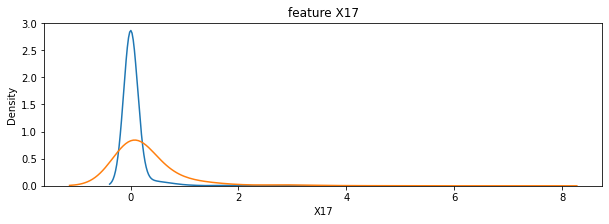

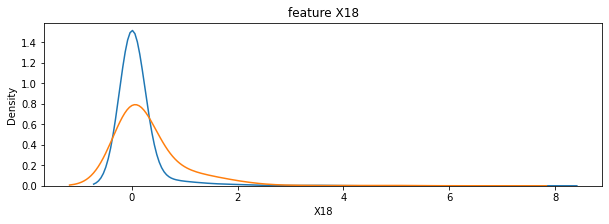

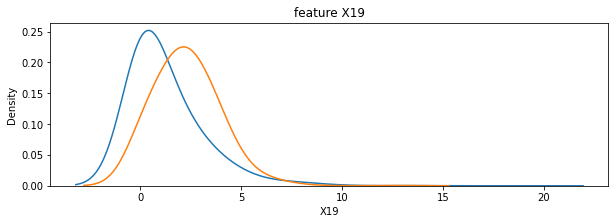

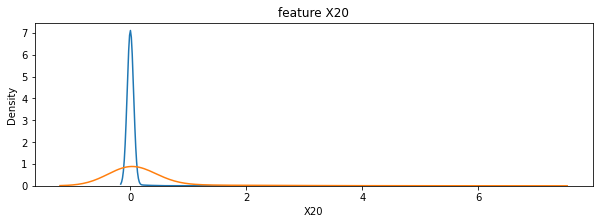

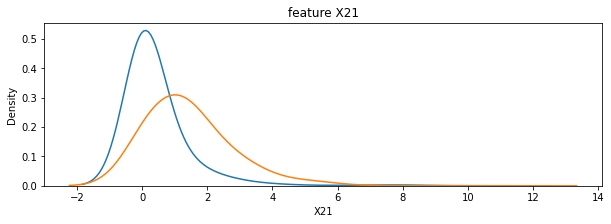

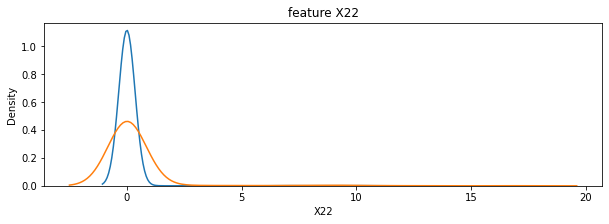

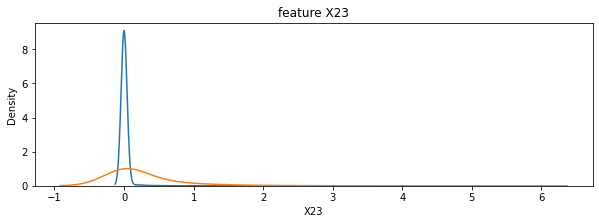

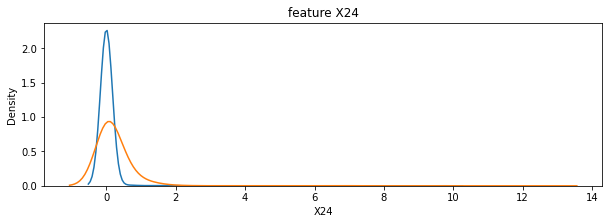

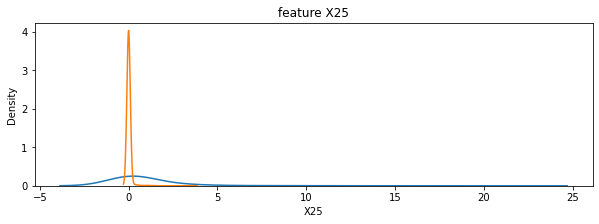

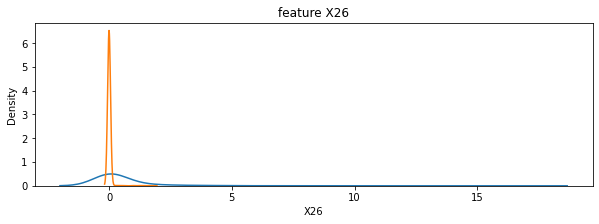

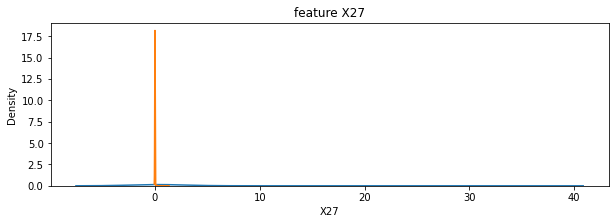

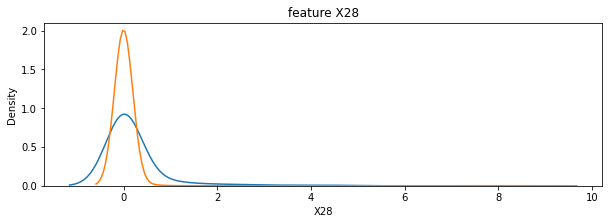

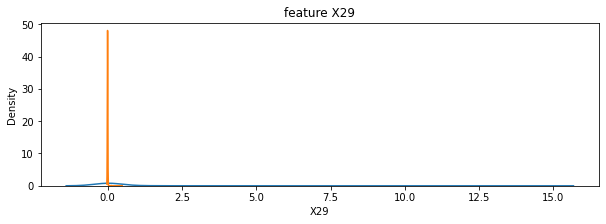

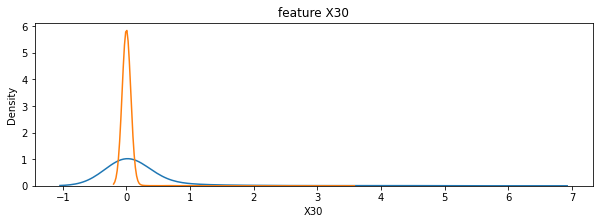

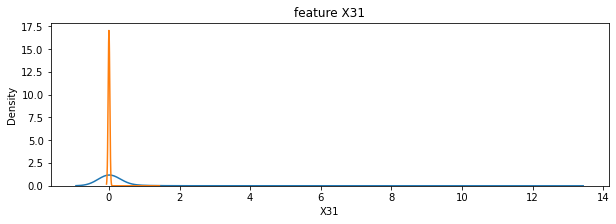

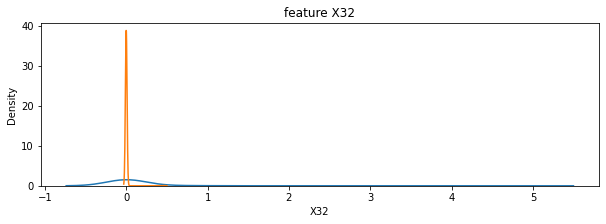

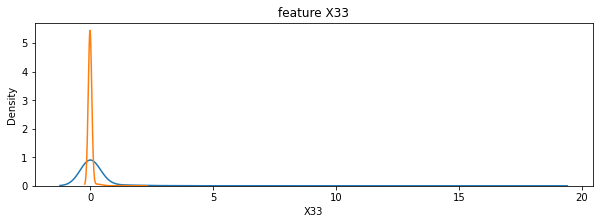

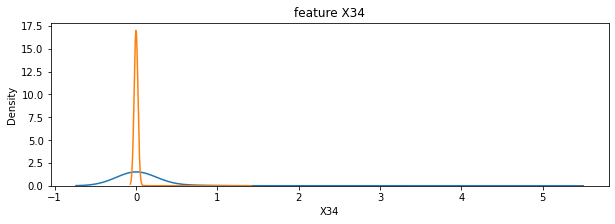

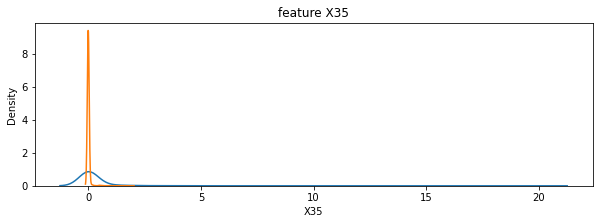

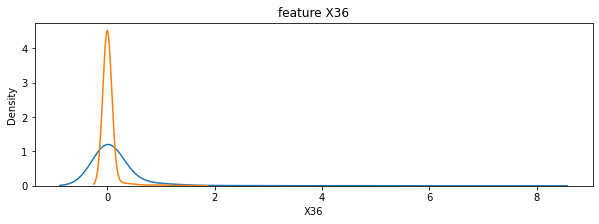

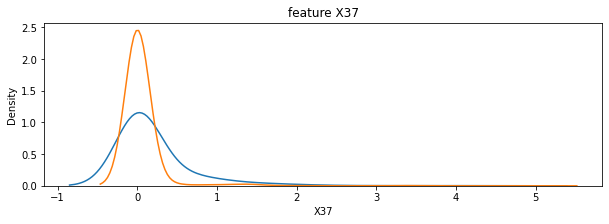

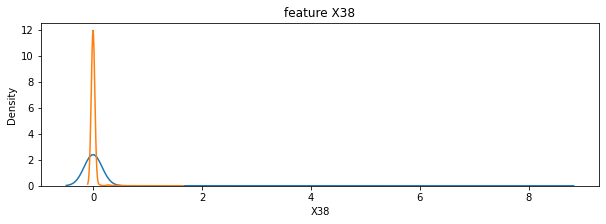

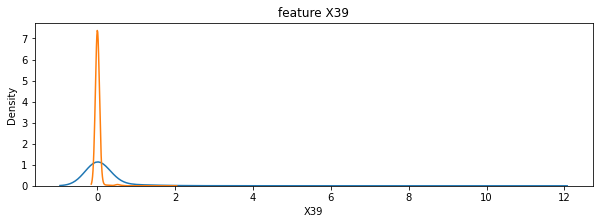

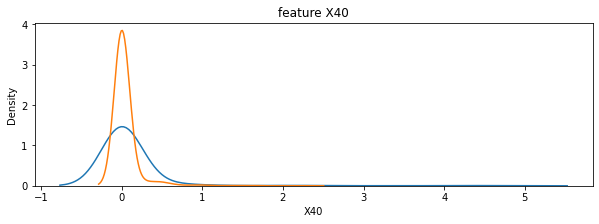

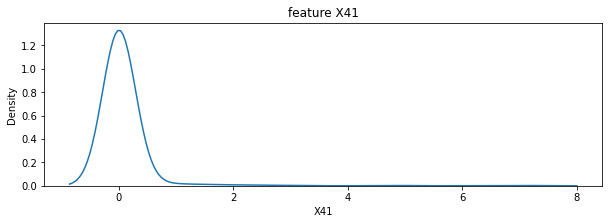

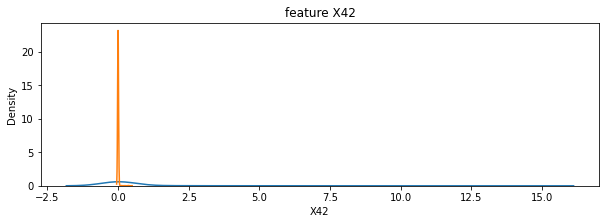

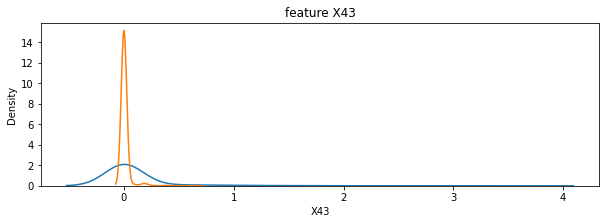

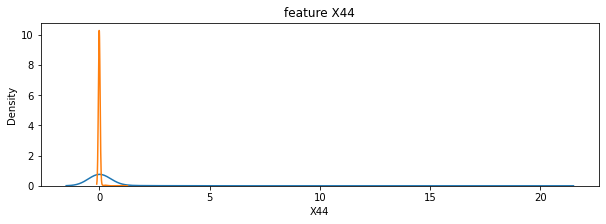

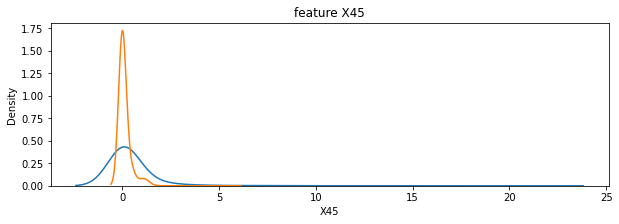

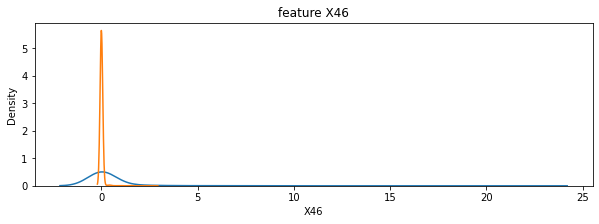

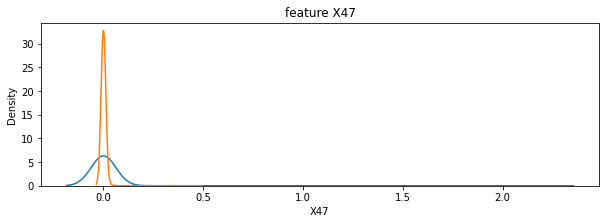

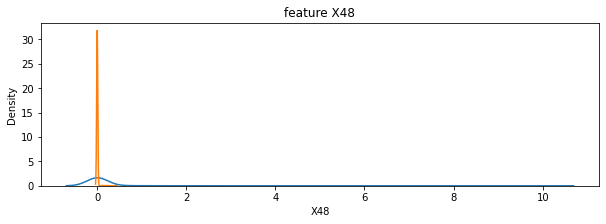

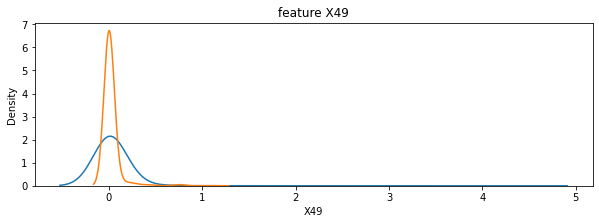

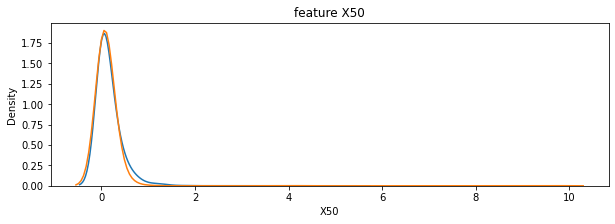

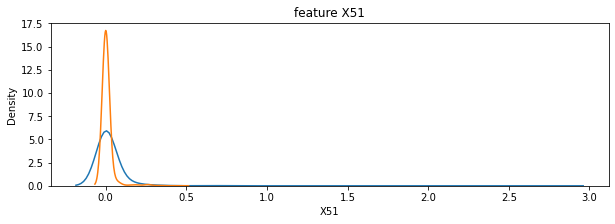

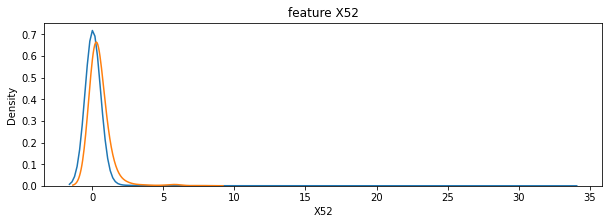

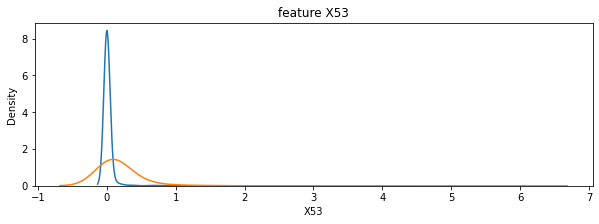

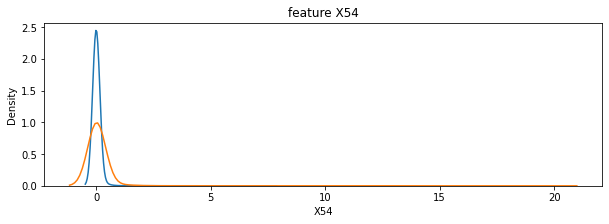

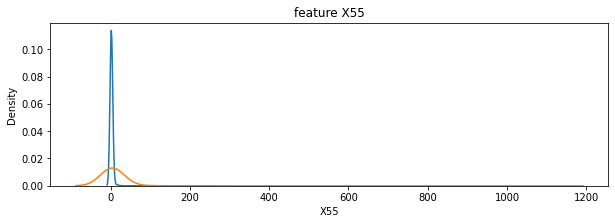

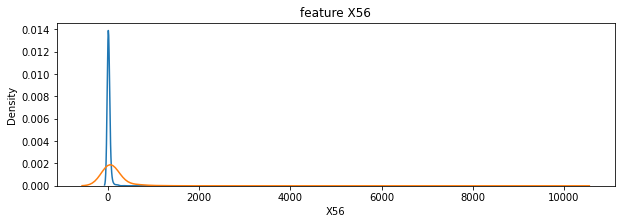

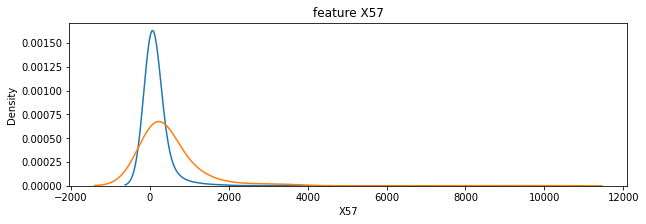

In [20]:
for i in range(1,58):
    plt.figure(figsize = (10,3))
    plt.title('feature '+ 'X' +str(int(i)))
    sns.kdeplot(data['X'+str(i)][data['Y'] == 0], label = 'Y', bw =0.6)
    sns.kdeplot(data['X'+str(i)][data['Y'] == 1], label = 'Y', bw =0.6)

Calculate correlation of each feature with the target variable

In [21]:
for i in range(1,58): 
    corr, _ = spearmanr(data['X'+str(i)], data['Y'])
    print('Spearmans correlation of ' + 'X' + str(i) + ': ' + str(corr))

Spearmans correlation of X1: 0.24953697180864834
Spearmans correlation of X2: 0.30617440879539837
Spearmans correlation of X3: 0.3427042351595624
Spearmans correlation of X4: 0.09344292816543916
Spearmans correlation of X5: 0.4046743633270969
Spearmans correlation of X6: 0.3310498926252795
Spearmans correlation of X7: 0.5214599291146869
Spearmans correlation of X8: 0.36158469457479303
Spearmans correlation of X9: 0.31045832406172114
Spearmans correlation of X10: 0.3065451303356641
Spearmans correlation of X11: 0.36646708849701376
Spearmans correlation of X12: 0.15014035178327859
Spearmans correlation of X13: 0.21570682402542976
Spearmans correlation of X14: 0.16258880723117392
Spearmans correlation of X15: 0.2701486000063946
Spearmans correlation of X16: 0.5044044719537486
Spearmans correlation of X17: 0.36540572954189054
Spearmans correlation of X18: 0.29879661231914767
Spearmans correlation of X19: 0.37292028375895625
Spearmans correlation of X20: 0.33141058843603466
Spearmans correl

Calculate feature importances

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1,bootstrap=True,verbose=5,random_state=1)
rf.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(n_jobs=-1, random_state=1, verbose=5)

In [23]:
rf.feature_importances_

array([0.00432021, 0.00395646, 0.01257986, 0.00106977, 0.02639781,
       0.00715428, 0.08002177, 0.01423978, 0.00548053, 0.00750966,
       0.01284769, 0.01289561, 0.00326175, 0.0020033 , 0.00092031,
       0.05635713, 0.01846575, 0.01033773, 0.0320201 , 0.00276961,
       0.05201646, 0.00175941, 0.02728521, 0.03649997, 0.04596373,
       0.01905438, 0.02149145, 0.00541076, 0.00132624, 0.0031542 ,
       0.00154363, 0.00039649, 0.00308443, 0.00063815, 0.00332462,
       0.00382283, 0.0106575 , 0.00081492, 0.00289025, 0.00118464,
       0.00111827, 0.00627581, 0.00127223, 0.00170492, 0.01045735,
       0.01541115, 0.00027636, 0.00138798, 0.00449173, 0.0122061 ,
       0.00236128, 0.10156518, 0.12362314, 0.00328029, 0.06397266,
       0.05352627, 0.04014091])

Plot feature importances

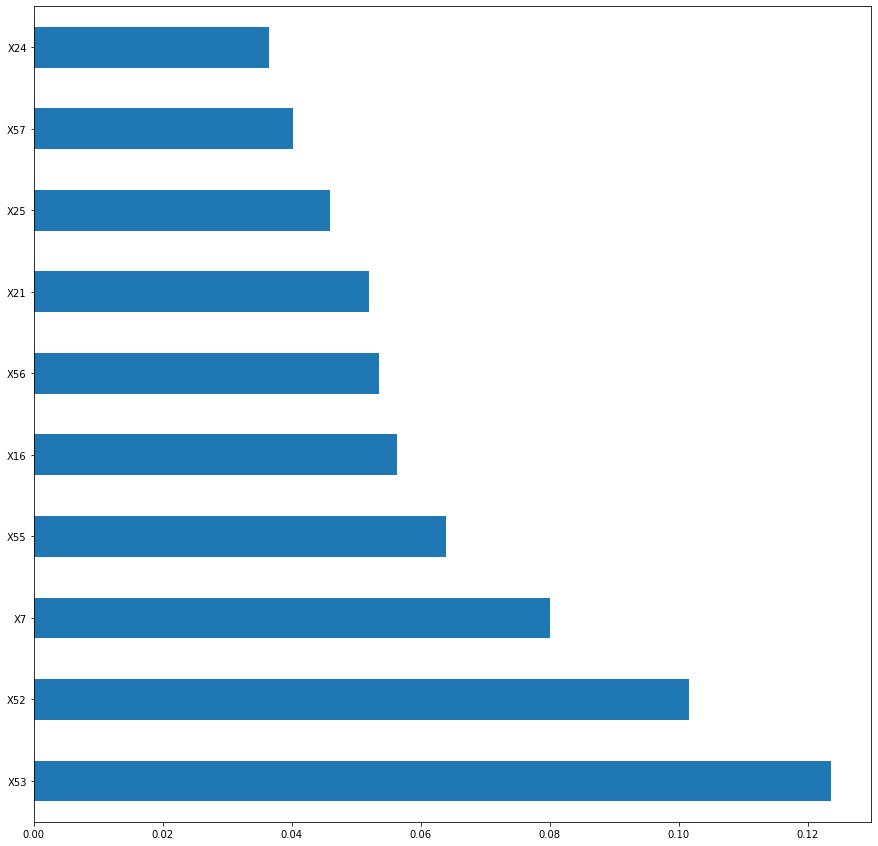

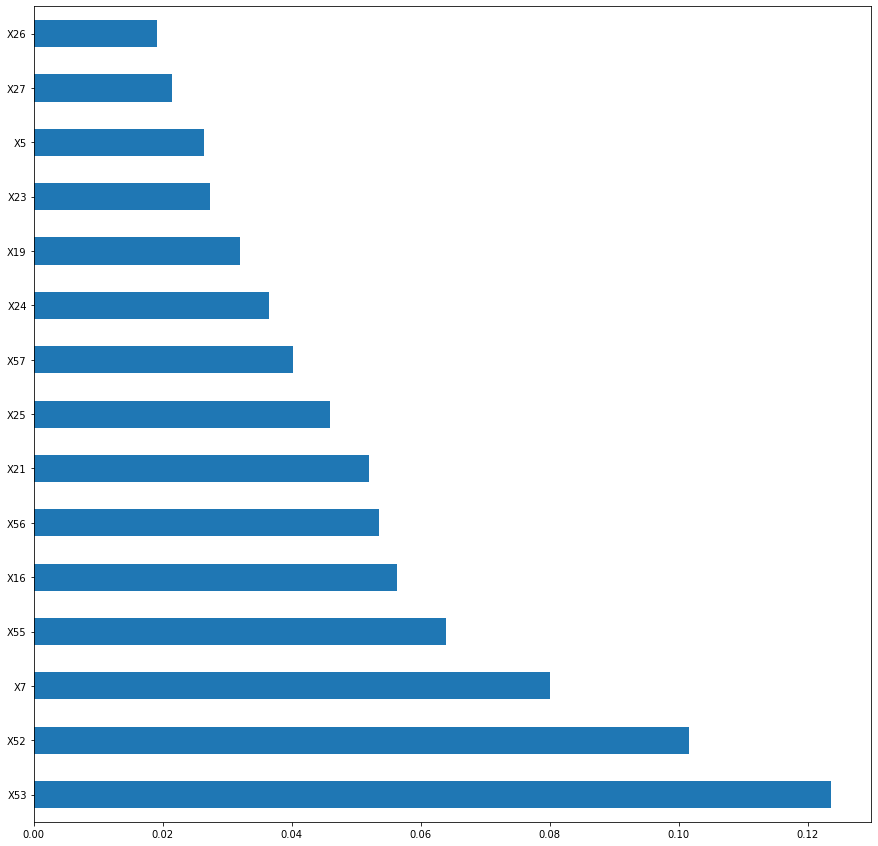

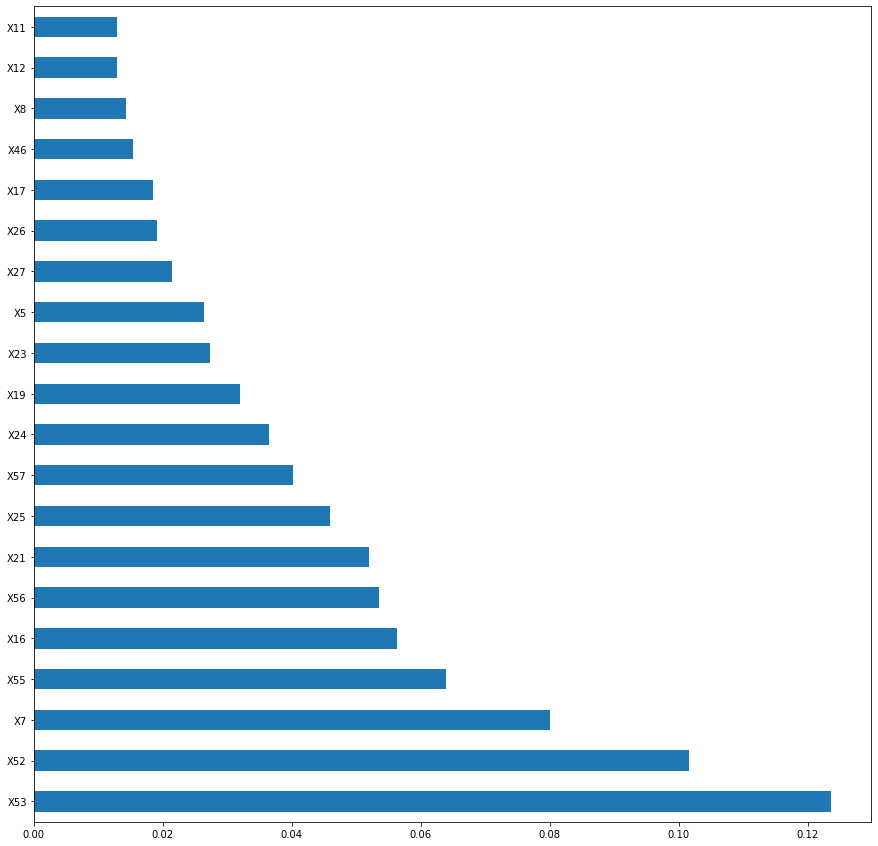

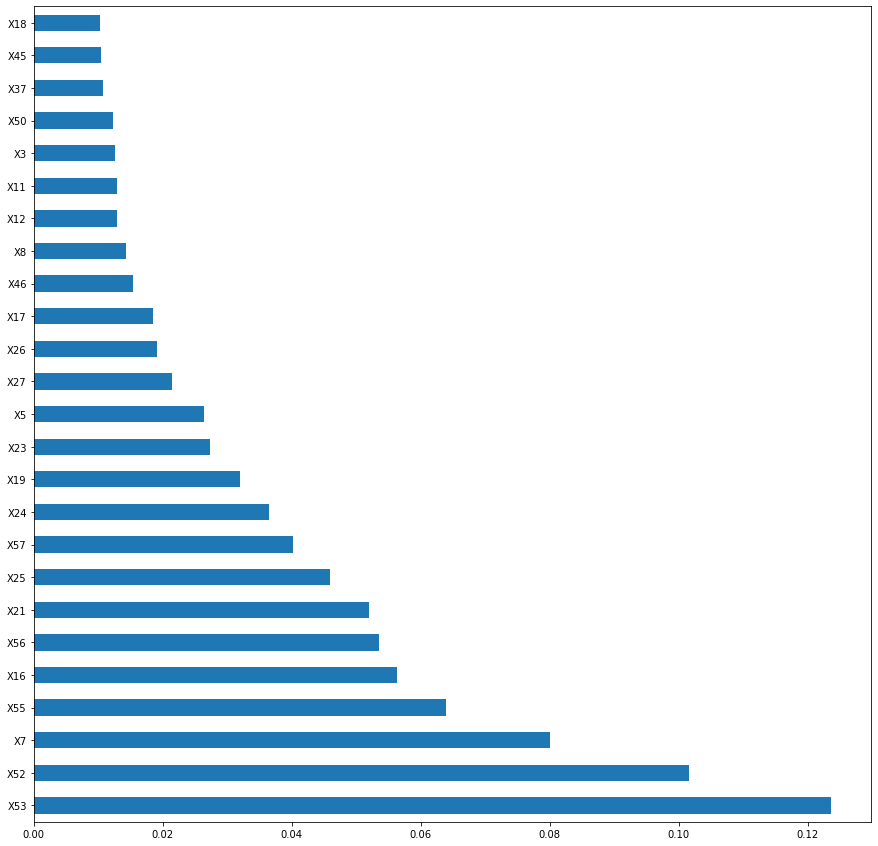

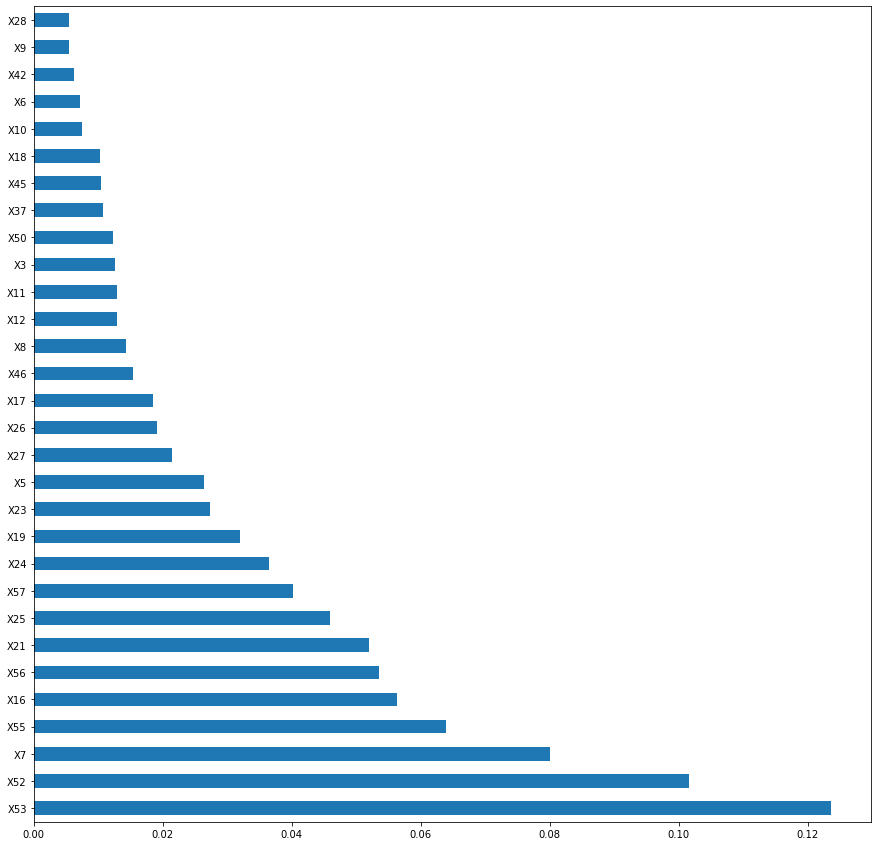

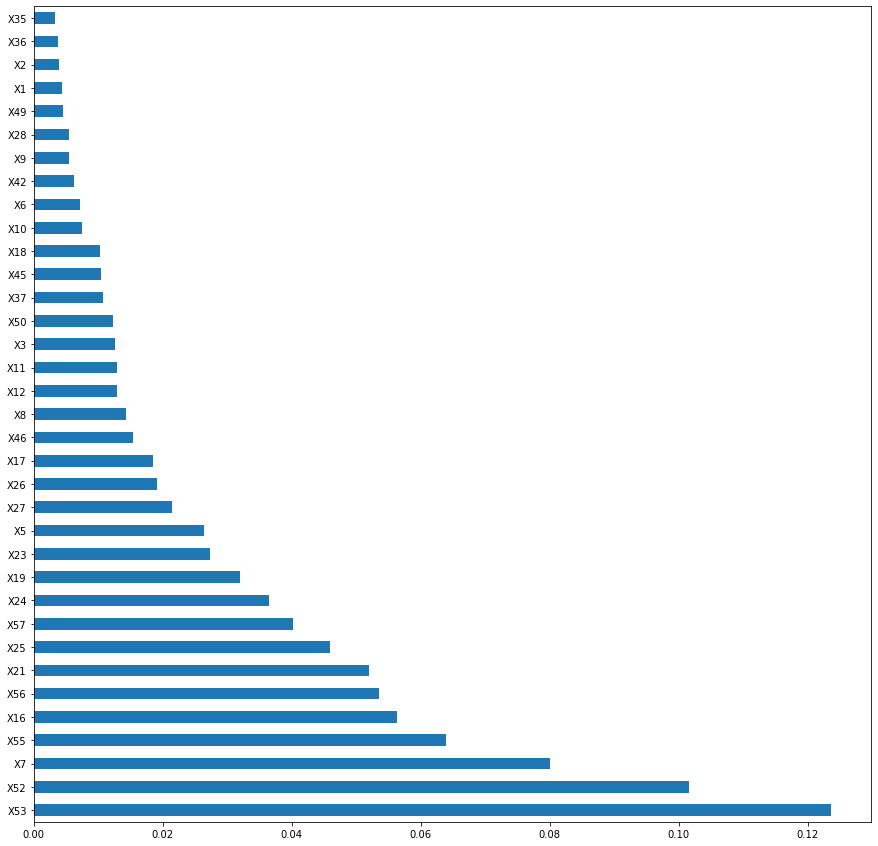

In [24]:
feat_importances=pd.Series(rf.feature_importances_, index=X.columns)
for i in range(10,40,5):
  feat_importances.nlargest(i).plot(kind='barh',figsize=(15,15))
  plt.show()

Filter important features

In [94]:
feature_set = feat_importances[feat_importances >= 0.005].index.to_list()
len(feature_set)

30

In [95]:
feature_set

['X3',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X16',
 'X17',
 'X18',
 'X19',
 'X21',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X37',
 'X42',
 'X45',
 'X46',
 'X50',
 'X52',
 'X53',
 'X55',
 'X56',
 'X57']

Storing useful variables for modeling

In [106]:
%store X
del X

Stored 'X' (DataFrame)


In [107]:
%store y
del y

Stored 'y' (DataFrame)


In [108]:
%store feature_set
del feature_set

Stored 'feature_set' (list)
